#Evaluation of SegFormer models

Pipeline:

*   find best learning rate
*   find best batch size
*   evaluate performance using weight decay
*   test augmentation of images

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# set path
%cd '/content/gdrive/MyDrive/Speciale'

/content/gdrive/MyDrive/Speciale


In [ ]:
# import dependencies

import pickle
from matplotlib import pyplot as plt

# Model description
<font color="orange">Orange color indicate that selected val images are good</font>

1.   b0, epoch=15, lr=0.00006, batch_size=2
2.   b5, epoch=10, lr=0.00006, batch_size=2
3.   b0, epoch=20, lr=0.00006, batch_size=4
4.   b0, epoch=20, lr=0.00006, batch_size=10
5.   b0, epoch=30, lr=0.00002, batch_size=10
6.   b0, epoch=30, lr=0.00002, batch_size=4
7.   b0, epoch=30, lr=0.00004, batch_size=6
8.   b0, epoch=30, lr=0.00006, batch_size=10, weight_decay=0.00002
9.   b0, epoch=30, lr=0.00006, batch_size=10, weight_decay=0.004 (default decay)
10.  b0, epoch=20, lr=0.00006, batch_size=10 (as model 4, but with seed=20 in stead of 42)

AN ERROR WAS FOUND IN THREE OF MY MASKS. THE FIRST 10 MODELS ARE DISCHARDED AND THE MISTAKE CORRECTED.

EVALUATE LEARNING RATE

11.  <font color="orange">b0, epoch=20, lr=0.00006, batch_size=10</font>
12.  <font color="orange">b0, epoch=20, lr=0.00006, batch_size=10, weight_decay=0.004</font>
13.  b0, epoch=30, lr=0.00002, batch_size=10
14.  b0, epoch=30, lr=0.00004, batch_size=10
15.  b0, epoch=30, lr=0.00001, batch_size=10
16.  b0, epoch=30, lr=0.00006, batch_size=10
17.  b0, epoch=30, lr=0.00008, batch_size=10

EVALUATE BATCH SIZE

18.  b0, epoch=30, lr=0.00006, batch_size=14
19.  <font color="orange">b0, epoch=30, lr=0.00006, batch_size=6</font>
20.  b0, epoch=30, lr=0.00006, batch_size=2
21.  B0, epoch=30, lr=0.00004, batch_size=14
22.  <font color="orange">b0, epoch=30, lr=0.00004, batch_size=6</font>
23.  b0, epoch=30, lr=0.00004, batch_size=2
24.  <font color="orange">b0, epoch=30, lr=0.00006, batch_size=6 (equal to model19 but seed=20)</font>

EXTRA TRIALS WITH LEARNING RATE

25.  b0, epoch=50, lr=0.000005, batch_size=10
26.  b0, epoch=50, lr=0.00001, batch_size=10

EVALUATE WEIGHT DECAY

27.  b0, epoch=30, lr=0.00004, batch_size=6, weight_decay=0.00004
28.  b0, epoch=30, lr=0.00004, batch_size=6, weight_decay=0.0004
29.  b0, epoch=30, lr=0.00004, batch_size=6, weight_decay=0.000004
30.  <font color="orange">b0, epoch=50, lr=0.00004, batch_size=6</font>

AUGEMENTATION

aug1_little\
aug2_more\
aug3_validation_more\
ref with the same split of dataset



SHORT EVALUATION OF B5
b5_1, epoch=20, lr=0.00006, batch_size=2
b5_2, epoch=20, lr=0.00004, batch_size=2

#Loading model parameters

In [ ]:

with open('model_history/11.pkl', 'rb') as file:
  model_11 = pickle.load(file)

with open('model_history/12.pkl', 'rb') as file:
  model_12 = pickle.load(file)

with open('model_history/13.pkl', 'rb') as file:
  model_13 = pickle.load(file)

with open('model_history/14.pkl', 'rb') as file:
  model_14 = pickle.load(file)

with open('model_history/15.pkl', 'rb') as file:
  model_15 = pickle.load(file)

with open('model_history/16.pkl', 'rb') as file:
  model_16 = pickle.load(file)

with open('model_history/17.pkl', 'rb') as file:
  model_17 = pickle.load(file)

with open('model_history/18.pkl', 'rb') as file:
  model_18 = pickle.load(file)

with open('model_history/19.pkl', 'rb') as file:
  model_19 = pickle.load(file)

with open('model_history/20.pkl', 'rb') as file:
  model_20 = pickle.load(file)

with open('model_history/21.pkl', 'rb') as file:
  model_21 = pickle.load(file)

with open('model_history/22.pkl', 'rb') as file:
  model_22 = pickle.load(file)

with open('model_history/23.pkl', 'rb') as file:
  model_23 = pickle.load(file)

with open('model_history/24.pkl', 'rb') as file:
  model_24 = pickle.load(file)

with open('model_history/25.pkl', 'rb') as file:
  model_25 = pickle.load(file)

with open('model_history/26.pkl', 'rb') as file:
  model_26 = pickle.load(file)

with open('model_history/27.pkl', 'rb') as file:
  model_27 = pickle.load(file)

with open('model_history/28.pkl', 'rb') as file:
  model_28 = pickle.load(file)

with open('model_history/29.pkl', 'rb') as file:
  model_29 = pickle.load(file)

with open('model_history/30.pkl', 'rb') as file:
  model_30 = pickle.load(file)

In [ ]:
# augmentation

with open('model_history/30.pkl', 'rb') as file:
  model_30 = pickle.load(file)

with open('model_history/aug1_little.pkl', 'rb') as file:
  aug1_little = pickle.load(file)

with open('model_history/aug2_more.pkl', 'rb') as file:
  aug2_more = pickle.load(file)

with open('model_history/aug3_val_aug.pkl', 'rb') as file:
  aug3_val_aug = pickle.load(file)

with open('model_history/aug4_ref.pkl', 'rb') as file:
  aug4_ref = pickle.load(file)



#Find learning rate

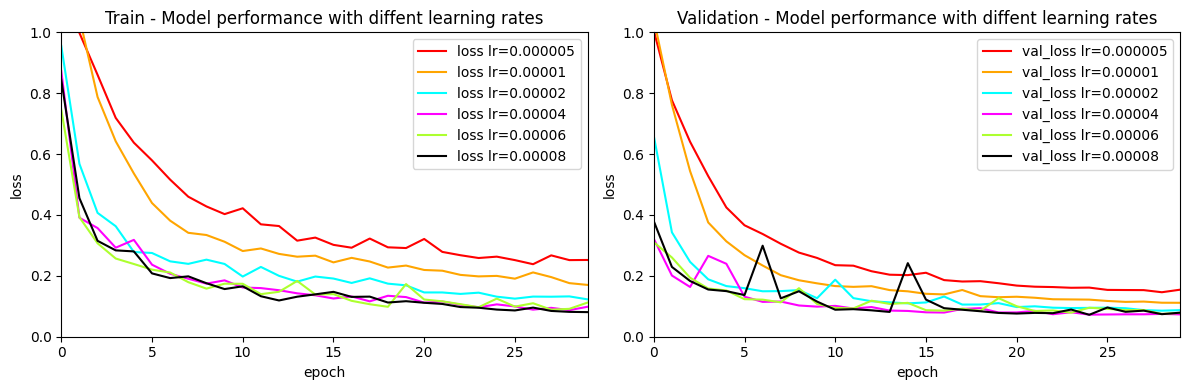

In [ ]:
# Plot impact of different learning rates, batch_size=10

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
ax1.plot(model_25['loss'], label='loss lr=0.000005', color='red')
ax1.plot(model_15['loss'], label='loss lr=0.00001', color='orange')
#ax1.plot(model_26['loss'], label='loss lr=0.00001', color='orange')
ax1.plot(model_13['loss'], label='loss lr=0.00002', color='cyan')
ax1.plot(model_14['loss'], label='loss lr=0.00004', color='fuchsia')
ax1.plot(model_16['loss'], label='loss lr=0.00006', color='greenyellow')
ax1.plot(model_17['loss'], label='loss lr=0.00008', color='black')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_ylim(0, 1)
ax1.set_xlim(0, 29)
ax1.set_title('Train - Model performance with diffent learning rates')
ax1.legend()

# Plot val_loss
ax2.plot(model_25['val_loss'], label='val_loss lr=0.000005', color='red')
ax2.plot(model_15['val_loss'], label='val_loss lr=0.00001', color='orange')
#ax2.plot(model_26['val_loss'], label='val_loss lr=0.00001', color='orange')
ax2.plot(model_13['val_loss'], label='val_loss lr=0.00002', color='cyan')
ax2.plot(model_14['val_loss'], label='val_loss lr=0.00004', color='fuchsia')
ax2.plot(model_16['val_loss'], label='val_loss lr=0.00006', color='greenyellow')
ax2.plot(model_17['val_loss'], label='val_loss lr=0.00008', color='black')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.set_ylim(0, 1)
ax2.set_xlim(0, 29)
ax2.set_title('Validation - Model performance with diffent learning rates')
ax2.legend()

plt.tight_layout()
plt.show()


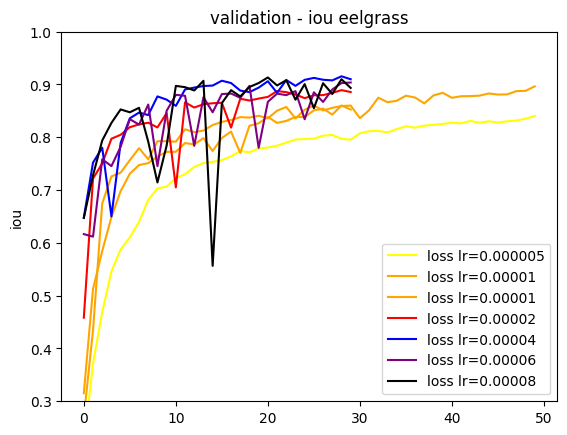

In [ ]:
# impact of learning rate on iou eelgrass

plt.plot(model_25['val_iou_eelgrass'], label='loss lr=0.000005', color='yellow')
plt.plot(model_15['val_iou_eelgrass'], label='loss lr=0.00001', color='orange')
plt.plot(model_26['val_iou_eelgrass'], label='loss lr=0.00001', color='orange')
plt.plot(model_13['val_iou_eelgrass'], label='loss lr=0.00002', color='red')
plt.plot(model_14['val_iou_eelgrass'], label='loss lr=0.00004', color='blue')
plt.plot(model_16['val_iou_eelgrass'], label='loss lr=0.00006', color='purple')
plt.plot(model_17['val_iou_eelgrass'], label='loss lr=0.00008', color='black')
plt.ylim(0.3, 1)

plt.ylabel('iou')
plt.title('validation - iou eelgrass')
plt.legend()
plt.show()

Learning rate 0.00004 and 0.00006 are assessed to be the best. Iou for eelgrass is the most important and is the one with the poorest performance and most uneven curve. Therefore, the model selection is based on this iou. It is also based on semantic segmentation results of validation images.

#Check performance using differnt seeds to split train and validation sets

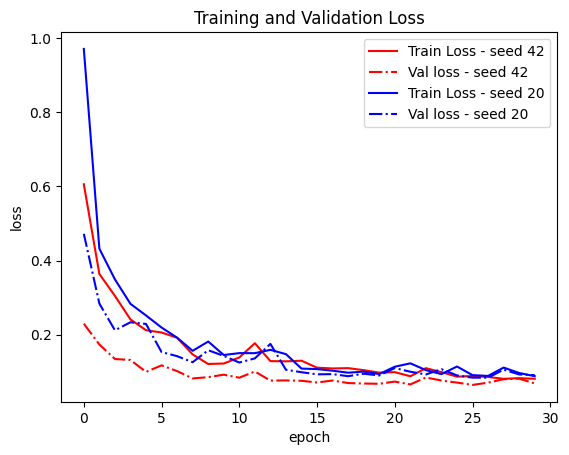

In [ ]:
#comparison of the same model but with different seed when splitting into train and validation dataset

plt.plot(model_19['loss'], label = 'Train Loss - seed 42', color='red')
plt.plot(model_19['val_loss'], label = 'Val loss - seed 42', color='red', linestyle='-.')
plt.plot(model_24['loss'], label = 'Train Loss - seed 20', color='blue')
plt.plot(model_24['val_loss'], label = 'Val loss - seed 20', color='blue', linestyle='-.')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

These trials are mostly performed to evaluate if validation loss is still lower than train loss when the datasets are split in another way. The split affects the performance in the beginning of the train period, but the model ends up the same-ish. Evaluation of the result on semantic segmentaion of the validation images show the same. validation loss is still lower that train loss -  this might be due to the small size of my dataset.

#Find batch size

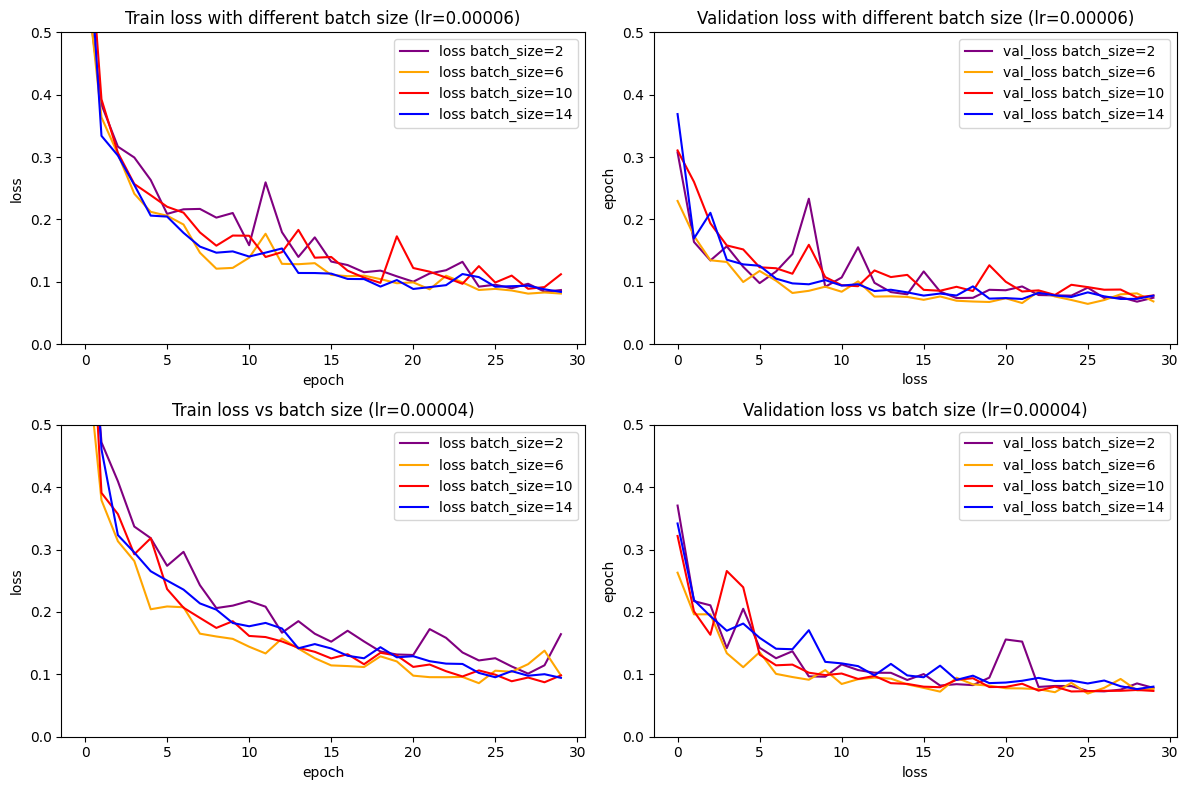

In [ ]:
# Impact of batch size (lr=0.00006 and lr=0.00004)

fig, ((ax1, ax2), (ax3, ax4)) =  plt.subplots(2, 2, figsize=(12, 8))

ax1.plot(model_20['loss'], label = 'loss batch_size=2', color='purple')
ax1.plot(model_19['loss'], label = 'loss batch_size=6', color='orange')
ax1.plot(model_16['loss'], label = 'loss batch_size=10', color='red')
ax1.plot(model_18['loss'], label = 'loss batch_size=14', color='blue')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_title('Train loss with different batch size (lr=0.00006)')
ax1.legend()
ax1.set_ylim(0, 0.5)

ax2.plot(model_20['val_loss'], label = 'val_loss batch_size=2', color='purple')
ax2.plot(model_19['val_loss'], label = 'val_loss batch_size=6', color='orange')
ax2.plot(model_16['val_loss'], label = 'val_loss batch_size=10', color='red')
ax2.plot(model_18['val_loss'], label = 'val_loss batch_size=14', color='blue')
ax2.set_xlabel('loss')
ax2.set_ylabel('epoch')
ax2.set_title('Validation loss with different batch size (lr=0.00006)')
ax2.legend()
ax2.set_ylim(0, 0.5)

ax3.plot(model_23['loss'], label = 'loss batch_size=2', color='purple')
ax3.plot(model_22['loss'], label = 'loss batch_size=6', color='orange')
ax3.plot(model_14['loss'], label = 'loss batch_size=10', color='red')
ax3.plot(model_21['loss'], label = 'loss batch_size=14', color='blue')
ax3.set_ylabel('loss')
ax3.set_xlabel('epoch')
ax3.set_title('Train loss vs batch size (lr=0.00004)')
ax3.legend()
ax3.set_ylim(0, 0.5)

ax4.plot(model_23['val_loss'], label = 'val_loss batch_size=2', color='purple')
ax4.plot(model_22['val_loss'], label = 'val_loss batch_size=6', color='orange')
ax4.plot(model_14['val_loss'], label = 'val_loss batch_size=10', color='red')
ax4.plot(model_21['val_loss'], label = 'val_loss batch_size=14', color='blue')
ax4.set_xlabel('loss')
ax4.set_ylabel('epoch')
ax4.set_title('Validation loss vs batch size (lr=0.00004)')
ax4.legend()
ax4.set_ylim(0, 0.5)

plt.tight_layout()
plt.show()

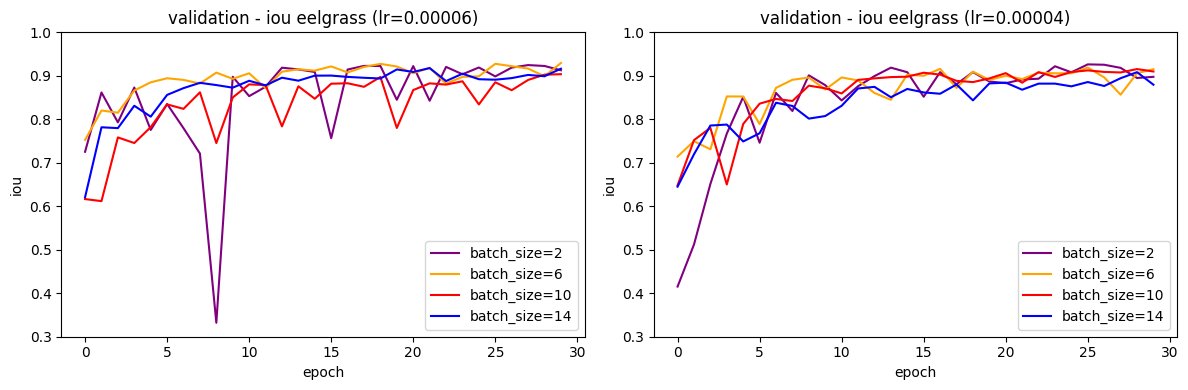

In [ ]:
# impact of batch size on iou eelgrass (lr=0.00006 and lr=0.00004)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(model_20['val_iou_eelgrass'], label = 'batch_size=2', color='purple')
ax1.plot(model_19['val_iou_eelgrass'], label = 'batch_size=6', color='orange')
ax1.plot(model_16['val_iou_eelgrass'], label = 'batch_size=10', color='red')
ax1.plot(model_18['val_iou_eelgrass'], label = 'batch_size=14', color='blue')
#ax1.plot(model_24['val_iou_eelgrass'], label = 'batch_size=6', color='green')
ax1.set_ylabel('iou')
ax1.set_xlabel('epoch')
ax1.set_title('validation - iou eelgrass (lr=0.00006)')
ax1.set_ylim(0.3, 1)
ax1.legend()

ax2.plot(model_23['val_iou_eelgrass'], label = 'batch_size=2', color='purple')
ax2.plot(model_22['val_iou_eelgrass'], label = 'batch_size=6', color='orange')
ax2.plot(model_14['val_iou_eelgrass'], label = 'batch_size=10', color='red')
ax2.plot(model_21['val_iou_eelgrass'], label = 'batch_size=14', color='blue')
ax2.set_ylabel('iou')
ax2.set_xlabel('epoch')
ax2.set_ylim(0.3, 1)
ax2.set_title('validation - iou eelgrass (lr=0.00004)')
ax2.legend()

plt.tight_layout()
plt.show()

Batch size do not seem to have a great impact on model performance. Selection of batch size is done looking at the result of semantic segmentation on validation images. A batch size = 6 is selected as the best. learning rate 0.00004 generates slightly better images than learning rate 0.00006

#Best model so far


*   learning rate = 0.00004
*   Batch size = 6
*   Epoch = 30



#Weight decay

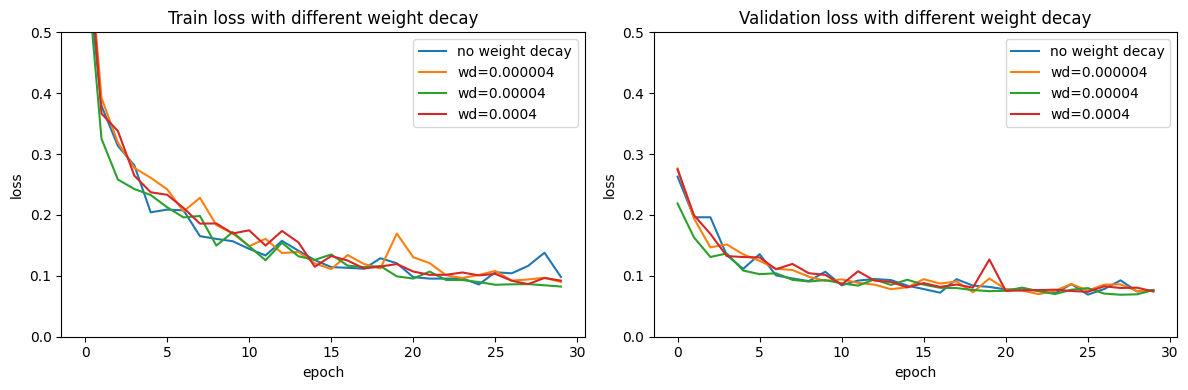

In [ ]:
# experiments on weight decay is performed on the beste model so far
# weight decay is chosen as a factor 10 up/down/equal to the learning rate

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(model_22['loss'], label = 'no weight decay')
ax1.plot(model_29['loss'], label = 'wd=0.000004')
ax1.plot(model_27['loss'], label = 'wd=0.00004')
ax1.plot(model_28['loss'], label = 'wd=0.0004')
#ax1.plot(model_30['loss'], label = 'best model - no weight decay')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_title('Train loss with different weight decay')
ax1.legend()
ax1.set_ylim(0, 0.5)

ax2.plot(model_22['val_loss'], label = 'no weight decay')
ax2.plot(model_29['val_loss'], label = 'wd=0.000004')
ax2.plot(model_27['val_loss'], label = 'wd=0.00004')
ax2.plot(model_28['val_loss'], label = 'wd=0.0004')
#ax2.plot(model_30['val_loss'], label = 'best model - no weight decay')
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_ylim(0, 0.5)
ax2.set_title('Validation loss with different weight decay')
ax2.legend()

plt.tight_layout()
plt.show()

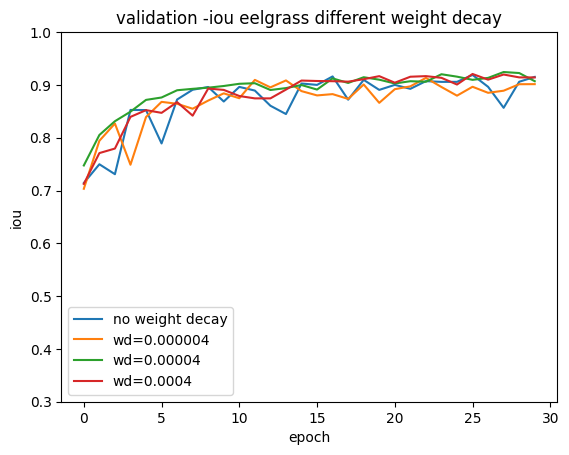

In [ ]:
# impact of weight decay on iou eelgrass

plt.plot(model_22['val_iou_eelgrass'], label = 'no weight decay')
plt.plot(model_29['val_iou_eelgrass'], label = 'wd=0.000004')
plt.plot(model_27['val_iou_eelgrass'], label = 'wd=0.00004')
plt.plot(model_28['val_iou_eelgrass'], label = 'wd=0.0004')
#plt.plot(model_30['val_iou_eelgrass'], label = 'best model no weight decay')

plt.ylabel('iou')
plt.xlabel('epoch')
plt.ylim(0.3, 1)
plt.title('validation -iou eelgrass different weight decay')
plt.legend()
plt.show()

Weight decay do not seem to have a great impact on model performance looking at the plots. Looking at the results on the val images, it can be seen that models with weight decay performs worse. Therefore the best model do not utilize weight decay.

#Best model

*   learning rate = 0.00004
*   Batch size = 6
*   Epoch = 50

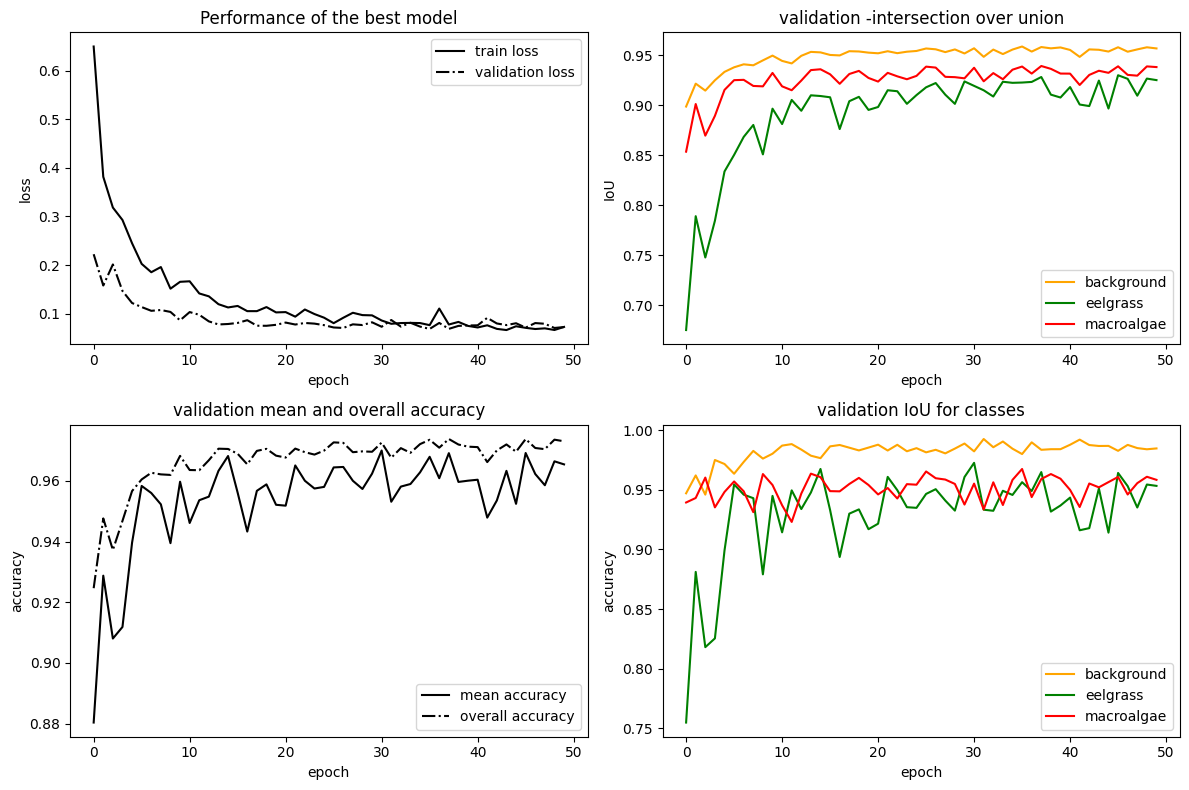

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) =  plt.subplots(2, 2, figsize=(12, 8))

ax1.plot(model_30['loss'], label='train loss', color='black')
ax1.plot(model_30['val_loss'], label='validation loss', color='black', linestyle='-.')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_title('Performance of the best model')
ax1.legend()

ax2.plot(model_30['val_iou_background'], label = 'background', color= 'orange')
ax2.plot(model_30['val_iou_eelgrass'], label = 'eelgrass', color ='green')
ax2.plot(model_30['val_iou_macroalgae'], label = 'macroalgae', color = 'red')
ax2.set_ylabel('IoU')
ax2.set_xlabel('epoch')
ax2.set_title('validation -intersection over union')
ax2.legend()

ax3.plot(model_30['val_mean_accuracy'], label='mean accuracy', color='black')
ax3.plot(model_30['val_overall_accuracy'], label='overall accuracy', color='black', linestyle='-.')
ax3.set_ylabel('accuracy')
ax3.set_xlabel('epoch')
ax3.set_title('validation mean and overall accuracy')
ax3.legend()

ax4.plot(model_30['val_accuracy_background'], label = 'background', color= 'orange')
ax4.plot(model_30['val_accuracy_eelgrass'], label = 'eelgrass', color ='green')
ax4.plot(model_30['val_accuracy_macroalgae'], label = 'macroalgae', color = 'red')
ax4.set_ylabel('accuracy')
ax4.set_xlabel('epoch')
ax4.set_title('validation IoU for classes')
ax4.legend()

plt.tight_layout()
plt.show()

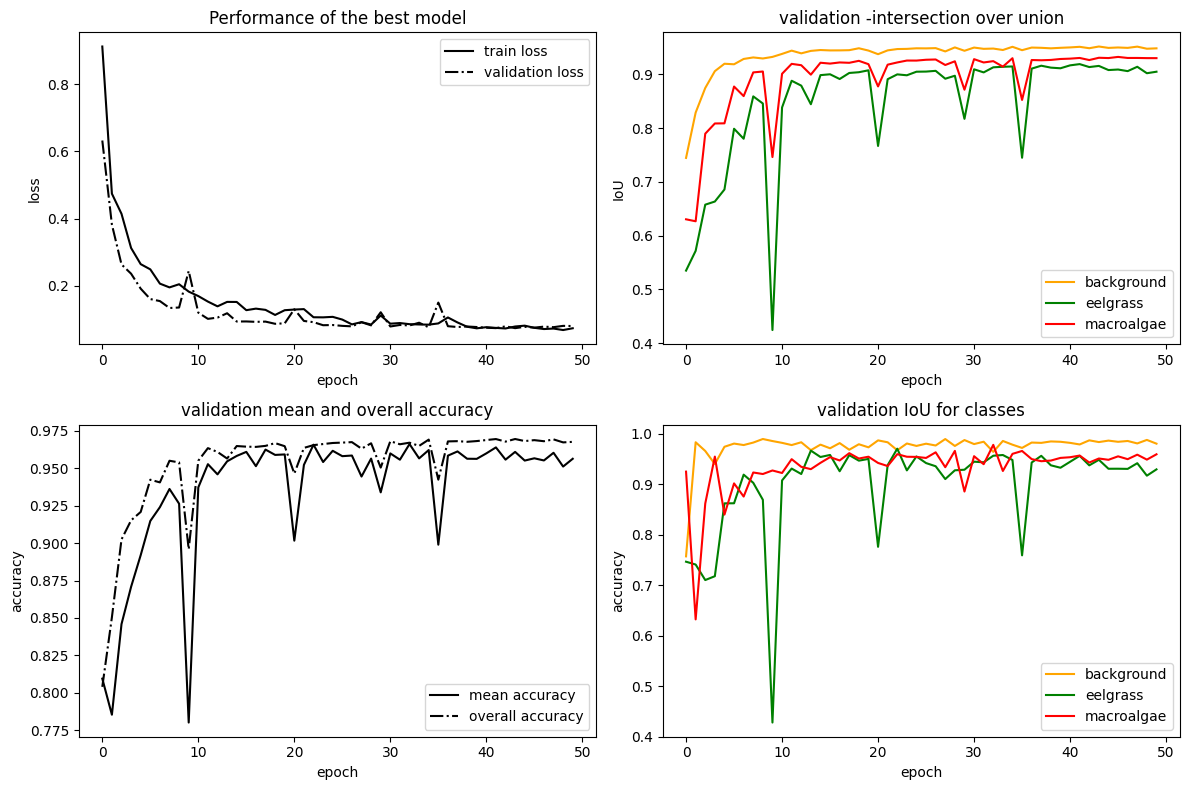

In [ ]:
# Best model without augmentation (model_30). The dataset is splitted using another seed
fig, ((ax1, ax2), (ax3, ax4)) =  plt.subplots(2, 2, figsize=(12, 8))

ax1.plot(aug4_ref['loss'], label='train loss', color='black')
ax1.plot(aug4_ref['val_loss'], label='validation loss', color='black', linestyle='-.')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_title('Performance of the best model')
ax1.legend()

ax2.plot(aug4_ref['val_iou_background'], label = 'background', color= 'orange')
ax2.plot(aug4_ref['val_iou_eelgrass'], label = 'eelgrass', color ='green')
ax2.plot(aug4_ref['val_iou_macroalgae'], label = 'macroalgae', color = 'red')
ax2.set_ylabel('IoU')
ax2.set_xlabel('epoch')
ax2.set_title('validation -intersection over union')
ax2.legend()

ax3.plot(aug4_ref['val_mean_accuracy'], label='mean accuracy', color='black')
ax3.plot(aug4_ref['val_overall_accuracy'], label='overall accuracy', color='black', linestyle='-.')
ax3.set_ylabel('accuracy')
ax3.set_xlabel('epoch')
ax3.set_title('validation mean and overall accuracy')
ax3.legend()

ax4.plot(aug4_ref['val_accuracy_background'], label = 'background', color= 'orange')
ax4.plot(aug4_ref['val_accuracy_eelgrass'], label = 'eelgrass', color ='green')
ax4.plot(aug4_ref['val_accuracy_macroalgae'], label = 'macroalgae', color = 'red')
ax4.set_ylabel('accuracy')
ax4.set_xlabel('epoch')
ax4.set_title('validation IoU for classes')
ax4.legend()

plt.tight_layout()
plt.show()

#Augmentation

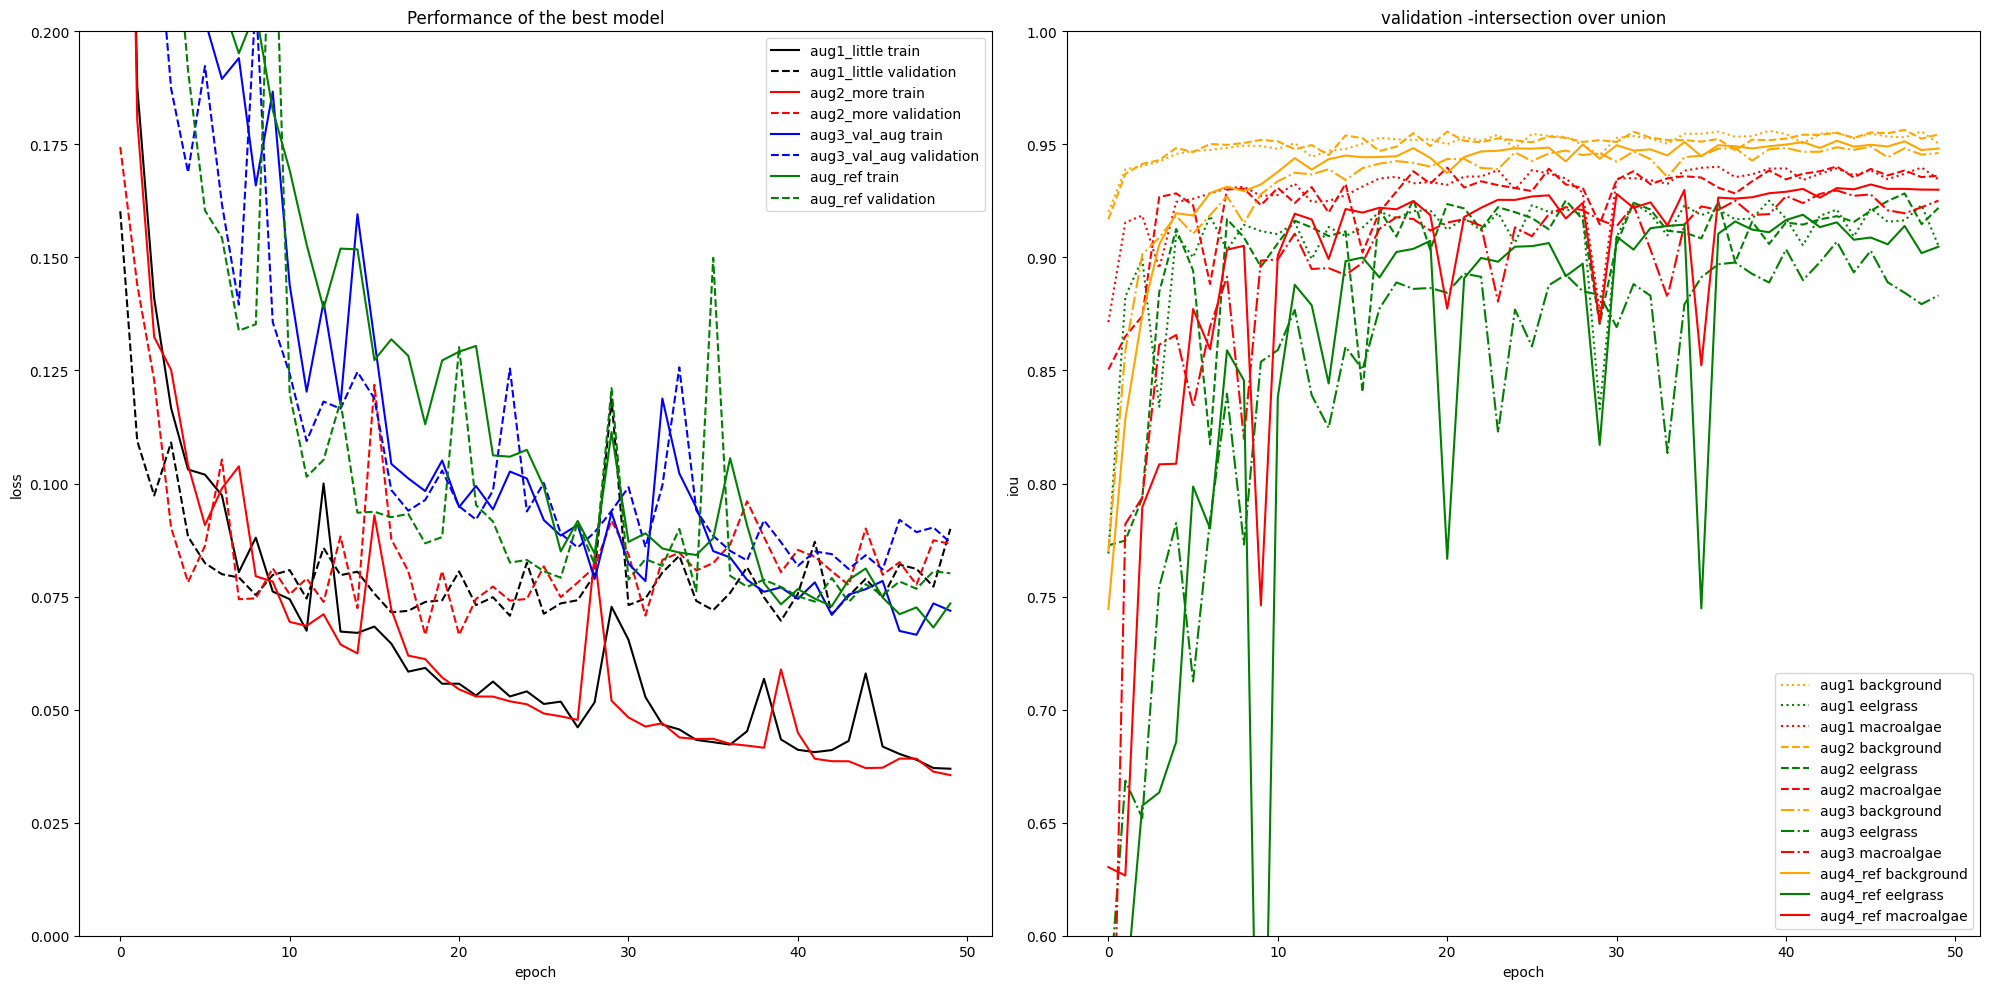

In [ ]:
# all 3 augmentation and the referene in the same plots showing model loss and IoU

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(aug1_little['loss'], label='aug1_little train', color='black')
ax1.plot(aug1_little['val_loss'], label='aug1_little validation', color='black', linestyle='dashed')
ax1.plot(aug2_more['loss'], label='aug2_more train', color='red')
ax1.plot(aug2_more['val_loss'], label='aug2_more validation', color='red', linestyle='dashed')
ax1.plot(aug3_val_aug['loss'], label='aug3_val_aug train', color='blue')
ax1.plot(aug3_val_aug['val_loss'], label='aug3_val_aug validation', color='blue', linestyle='dashed')
ax1.plot(aug4_ref['loss'], label='aug_ref train', color='green')
ax1.plot(aug4_ref['val_loss'], label='aug_ref validation', color='green', linestyle='dashed')

ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_ylim(0, 0.2)
ax1.set_title('Performance of the best model')
ax1.legend()

ax2.plot(aug1_little['val_iou_background'], label = 'aug1 background', color= 'orange', linestyle='dotted')
ax2.plot(aug1_little['val_iou_eelgrass'], label = 'aug1 eelgrass', color ='green', linestyle='dotted')
ax2.plot(aug1_little['val_iou_macroalgae'], label = 'aug1 macroalgae', color = 'red', linestyle='dotted')
ax2.plot(aug2_more['val_iou_background'], label = 'aug2 background', color= 'orange', linestyle='dashed')
ax2.plot(aug2_more['val_iou_eelgrass'], label = 'aug2 eelgrass', color ='green', linestyle='dashed')
ax2.plot(aug2_more['val_iou_macroalgae'], label = 'aug2 macroalgae', color = 'red', linestyle='dashed')
ax2.plot(aug3_val_aug['val_iou_background'], label = 'aug3 background', color= 'orange', linestyle='dashdot')
ax2.plot(aug3_val_aug['val_iou_eelgrass'], label = 'aug3 eelgrass', color ='green', linestyle='dashdot')
ax2.plot(aug3_val_aug['val_iou_macroalgae'], label = 'aug3 macroalgae', color = 'red', linestyle='dashdot')
ax2.plot(aug4_ref['val_iou_background'], label = 'aug4_ref background', color= 'orange')
ax2.plot(aug4_ref['val_iou_eelgrass'], label = 'aug4_ref eelgrass', color ='green')
ax2.plot(aug4_ref['val_iou_macroalgae'], label = 'aug4_ref macroalgae', color = 'red')
ax2.set_ylabel('iou')
ax2.set_xlabel('epoch')
ax2.set_ylim(0.6, 1)
ax2.set_title('validation -intersection over union')
ax2.legend()

plt.tight_layout()
plt.show()

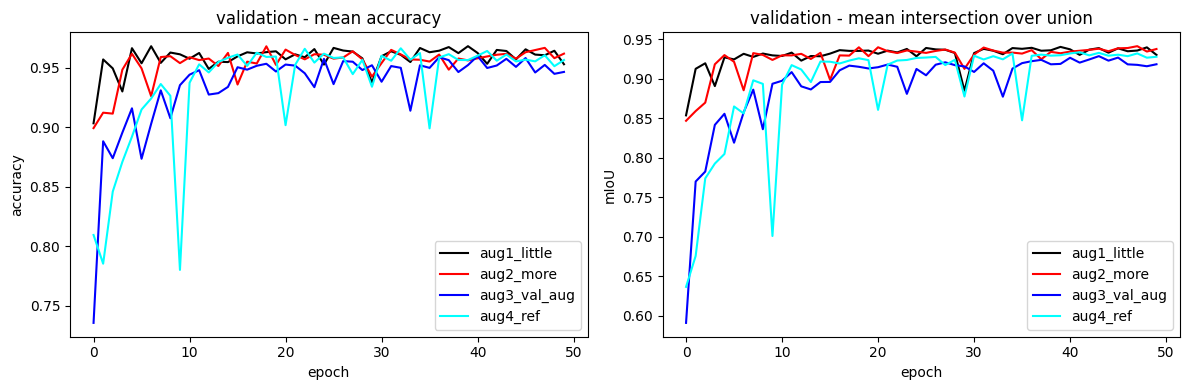

In [ ]:
# validation accuracy and IoU for the augmented datasets and the reference (best model)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(aug1_little['val_mean_accuracy'], label='aug1_little', color='black')
ax1.plot(aug2_more['val_mean_accuracy'], label='aug2_more', color='red')
ax1.plot(aug3_val_aug['val_mean_accuracy'], label='aug3_val_aug', color='blue')
ax1.plot(aug4_ref['val_mean_accuracy'], label='aug4_ref', color='cyan')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.set_title('validation - mean accuracy')
ax1.legend()

ax2.plot(aug1_little['val_mean_iou'], label = 'aug1_little', color='black')
ax2.plot(aug2_more['val_mean_iou'], label = 'aug2_more', color='red')
ax2.plot(aug3_val_aug['val_mean_iou'], label = 'aug3_val_aug', color= 'blue')
ax2.plot(aug4_ref['val_mean_iou'], label = 'aug4_ref', color='cyan')
ax2.set_ylabel('mIoU')
ax2.set_xlabel('epoch')
ax2.set_title('validation - mean intersection over union')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
with open('model_history/aug1_20_epoch.pkl', 'rb') as file:
  aug1_20_epoch = pickle.load(file)

with open('model_history/aug2_20_epoch.pkl', 'rb') as file:
  aug2_20_epoch = pickle.load(file)

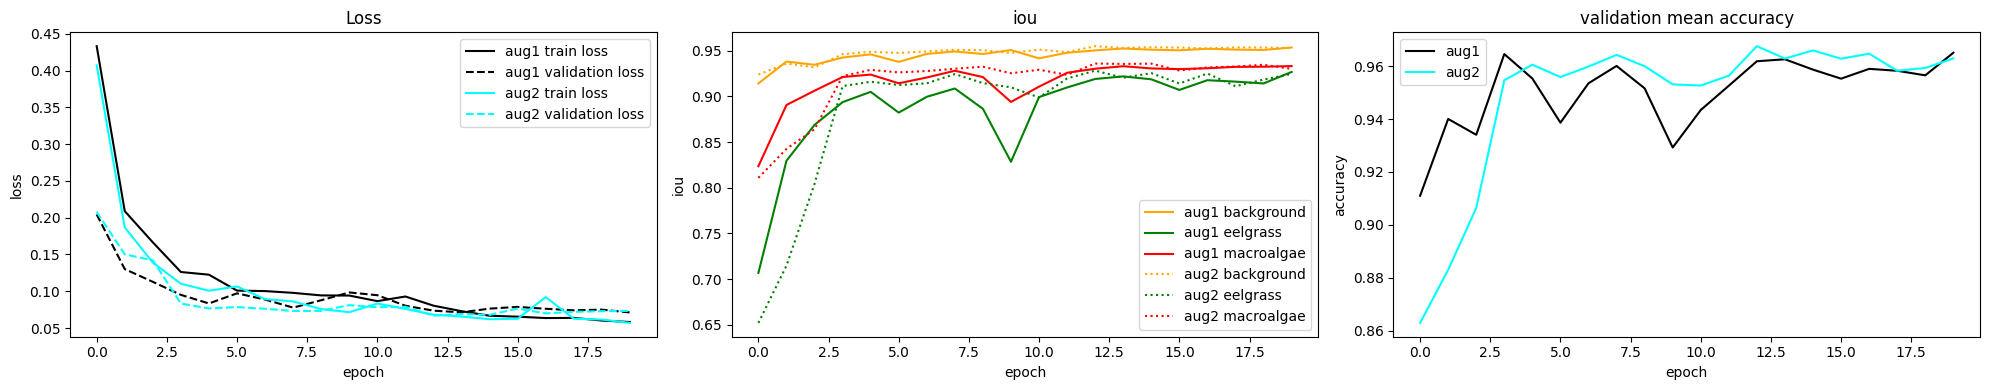

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))

ax1.plot(aug1_20_epoch['loss'], label='aug1 train loss', color='black')
ax1.plot(aug1_20_epoch['val_loss'], label='aug1 validation loss', color='black', linestyle='dashed')
ax1.plot(aug2_20_epoch['loss'], label='aug2 train loss', color='cyan')
ax1.plot(aug2_20_epoch['val_loss'], label='aug2 validation loss', color='cyan', linestyle='dashed')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_title('Loss')
ax1.legend()


ax2.plot(aug1_20_epoch['val_iou_background'], label = 'aug1 background', color= 'orange')
ax2.plot(aug1_20_epoch['val_iou_eelgrass'], label = 'aug1 eelgrass', color ='green')
ax2.plot(aug1_20_epoch['val_iou_macroalgae'], label = 'aug1 macroalgae', color = 'red')
ax2.plot(aug2_20_epoch['val_iou_background'], label = 'aug2 background', color= 'orange', linestyle='dotted')
ax2.plot(aug2_20_epoch['val_iou_eelgrass'], label = 'aug2 eelgrass', color ='green', linestyle='dotted')
ax2.plot(aug2_20_epoch['val_iou_macroalgae'], label = 'aug2 macroalgae', color = 'red', linestyle='dotted')
ax2.set_ylabel('iou')
ax2.set_xlabel('epoch')
ax2.set_title('iou')
ax2.legend()

ax3.plot(aug1_20_epoch['val_mean_accuracy'], label='aug1', color='black')
ax3.plot(aug2_20_epoch['val_mean_accuracy'], label='aug2', color='cyan')
ax3.set_ylabel('accuracy')
ax3.set_xlabel('epoch')
ax3.set_title('validation mean accuracy')
ax3.legend()

plt.tight_layout()
plt.show()

#Plots for the report

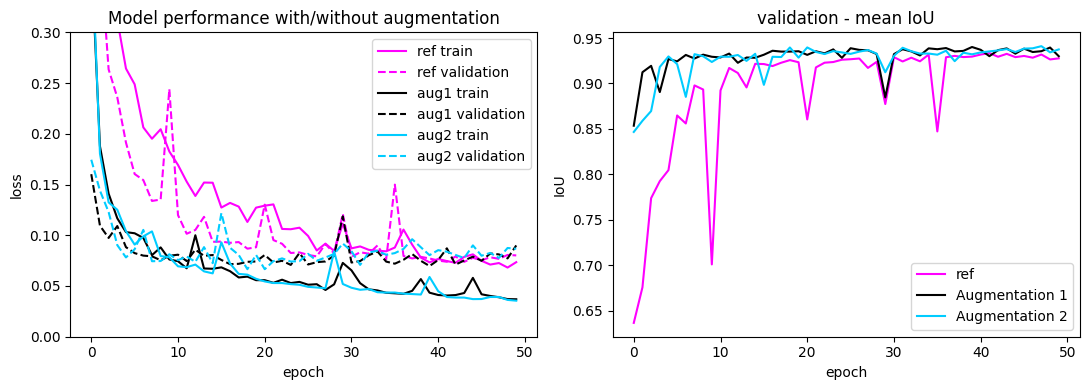

In [ ]:
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(11, 4))

ax1.plot(aug4_ref['loss'], label='ref train', color='fuchsia')
ax1.plot(aug4_ref['val_loss'], label='ref validation', color='fuchsia', linestyle ='dashed')
ax1.plot(aug1_little['loss'], label='aug1 train', color='black')
ax1.plot(aug1_little['val_loss'], label='aug1 validation', color='black', linestyle='dashed')
ax1.plot(aug2_more['loss'], label='aug2 train', color=[0, 0.8, 1])
ax1.plot(aug2_more['val_loss'], label='aug2 validation', color=[0, 0.8, 1], linestyle ='dashed')

ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_ylim(0, 0.3)
ax1.set_title('Model performance with/without augmentation')
ax1.legend()

ax2.plot(aug4_ref['val_mean_iou'], label = 'ref', color= 'fuchsia')
ax2.plot(aug1_little['val_mean_iou'], label = 'Augmentation 1', color ='black')
ax2.plot(aug2_more['val_mean_iou'], label ='Augmentation 2', color=[0, 0.8, 1])

ax2.set_ylabel('IoU')
ax2.set_xlabel('epoch')
#ax2.set_ylim(0.6, 1)
ax2.set_title('validation - mean IoU')
ax2.legend()

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.show()

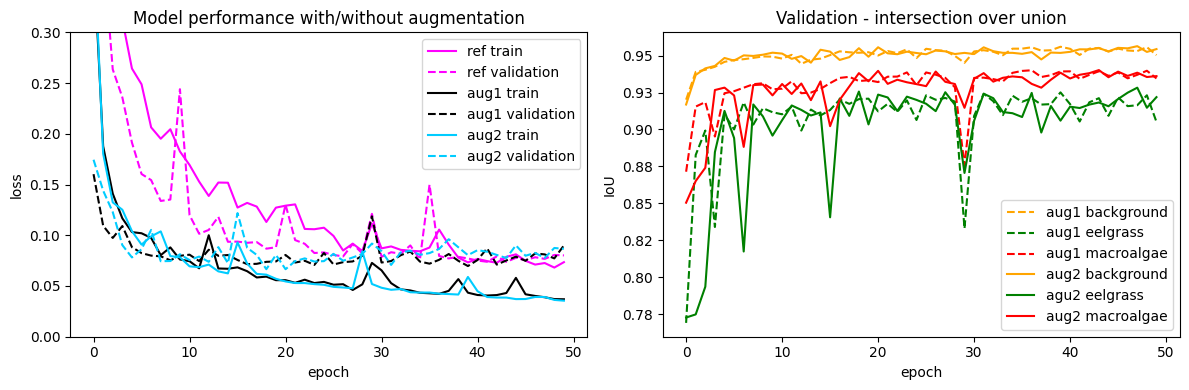

In [ ]:
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(12, 4))

ax1.plot(aug4_ref['loss'], label='ref train', color='fuchsia')
ax1.plot(aug4_ref['val_loss'], label='ref validation', color='fuchsia', linestyle ='dashed')
ax1.plot(aug1_little['loss'], label='aug1 train', color='black')
ax1.plot(aug1_little['val_loss'], label='aug1 validation', color='black', linestyle='dashed')
ax1.plot(aug2_more['loss'], label='aug2 train', color=[0, 0.8, 1])
ax1.plot(aug2_more['val_loss'], label='aug2 validation', color=[0, 0.8, 1], linestyle ='dashed')

ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_ylim(0, 0.3)
ax1.set_title('Model performance with/without augmentation')
ax1.legend()

ax2.plot(aug1_little['val_iou_background'], label = 'aug1 background', color= 'orange', linestyle='dashed')
ax2.plot(aug1_little['val_iou_eelgrass'], label = 'aug1 eelgrass', color ='green', linestyle='dashed')
ax2.plot(aug1_little['val_iou_macroalgae'], label = 'aug1 macroalgae', color = 'red', linestyle='dashed')
ax2.plot(aug2_more['val_iou_background'], label = 'aug2 background', color= 'orange')
ax2.plot(aug2_more['val_iou_eelgrass'], label = 'agu2 eelgrass', color ='green')
ax2.plot(aug2_more['val_iou_macroalgae'], label = 'aug2 macroalgae', color = 'red')

ax2.set_ylabel('IoU')
ax2.set_xlabel('epoch')
#ax2.set_ylim(0.6, 1)
ax2.set_title('Validation - intersection over union')
ax2.legend()

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.show()

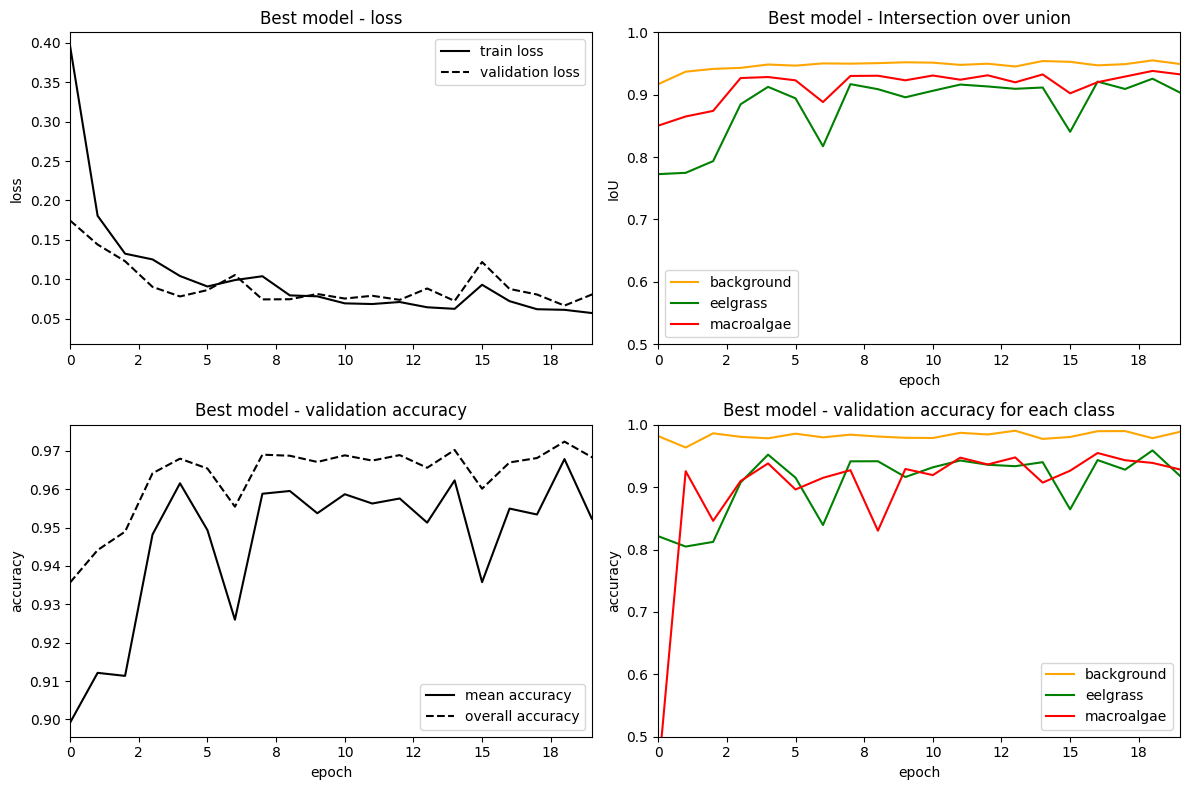

In [ ]:
import matplotlib.ticker as ticker

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

ax1.plot(aug2_more['loss'], label='train loss', color='black')
ax1.plot(aug2_more['val_loss'], label='validation loss', color='black', linestyle ='dashed')
ax1.set_ylabel('loss')
ax1.set_label('epoch')
ax1.set_xlim(0, 19)
ax1.set_title('Best model - loss')
ax1.legend()

ax2.plot(aug2_more['val_iou_background'], label = 'background', color= 'orange')
ax2.plot(aug2_more['val_iou_eelgrass'], label = 'eelgrass', color ='green')
ax2.plot(aug2_more['val_iou_macroalgae'], label = 'macroalgae', color = 'red')
ax2.set_ylabel('IoU')
ax2.set_xlabel('epoch')
ax2.set_xlim(0, 19)
ax2.set_ylim(0.5, 1)
ax2.set_title('Best model - Intersection over union')
ax2.legend()

ax3.plot(aug2_more['val_mean_accuracy'], label='mean accuracy', color='black')
ax3.plot(aug2_more['val_overall_accuracy'], label='overall accuracy', color='black', linestyle='dashed')
ax3.set_ylabel('accuracy')
ax3.set_xlabel('epoch')
ax3.set_xlim(0, 19)
ax3.set_title('Best model - validation accuracy')
ax3.legend()

ax4.plot(aug2_more['val_accuracy_background'], label = 'background', color='orange')
ax4.plot(aug2_more['val_accuracy_eelgrass'], label = 'eelgrass', color='green')
ax4.plot(aug3_val_aug['val_accuracy_macroalgae'], label = 'macroalgae', color= 'red')
ax4.set_ylabel('accuracy')
ax4.set_xlim(0, 19)
ax4.set_xlabel('epoch')
ax4.set_ylim(0.5, 1)
ax4.set_title('Best model - validation accuracy for each class')
ax4.legend()

ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
ax4.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

plt.tight_layout()
plt.show()


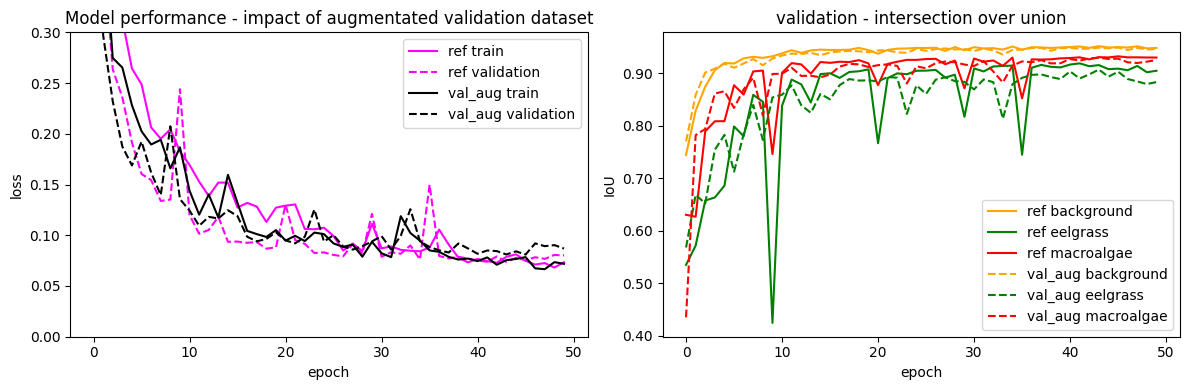

In [ ]:
# evaluation of the impact on augmentation of the validation dataset (aug3_val_aug)
import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(1,2 ,figsize=(12, 4))


ax1.plot(aug4_ref['loss'], label='ref train',  color='fuchsia')
ax1.plot(aug4_ref['val_loss'], label='ref validation', color='fuchsia', linestyle ='dashed')
ax1.plot(aug3_val_aug['loss'], label='val_aug train', color='black')
ax1.plot(aug3_val_aug['val_loss'], label='val_aug validation', color='black', linestyle='dashed')

ax1.set_ylim(0, 0.3)
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_title('Model performance - impact of augmentated validation dataset')
ax1.legend()


ax2.plot(aug4_ref['val_iou_background'], label = 'ref background', color= 'orange')
ax2.plot(aug4_ref['val_iou_eelgrass'], label = 'ref eelgrass', color ='green')
ax2.plot(aug4_ref['val_iou_macroalgae'], label = 'ref macroalgae', color = 'red')
ax2.plot(aug3_val_aug['val_iou_background'], label = 'val_aug background', color= 'orange', linestyle='dashed')
ax2.plot(aug3_val_aug['val_iou_eelgrass'], label = 'val_aug eelgrass', color ='green', linestyle='dashed')
ax2.plot(aug3_val_aug['val_iou_macroalgae'], label = 'val_aug macroalgae', color = 'red', linestyle='dashed')

ax2.set_ylabel('IoU')
ax2.set_xlabel('epoch')
ax2.set_title('validation - intersection over union')
ax2.legend()

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.show()

In [ ]:
# Get last metrics for the best models

with open('model_history/aug1_20_epoch.pkl', 'rb') as file:
  aug1_20_epoch = pickle.load(file)

with open('model_history/aug2_20_epoch.pkl', 'rb') as file:
  aug2_20_epoch = pickle.load(file)

with open('model_history/aug4_ref.pkl', 'rb') as file:
  aug4_ref = pickle.load(file)


print(aug1_20_epoch.keys())

dict_keys(['loss', 'val_loss', 'val_mean_iou', 'val_mean_accuracy', 'val_overall_accuracy', 'val_accuracy_background', 'val_accuracy_eelgrass', 'val_accuracy_macroalgae', 'val_iou_background', 'val_iou_eelgrass', 'val_iou_macroalgae'])


# Extracting the metrics from the last epoch in each model

In [ ]:
for key, value in aug1_20_epoch.items():
    last_index = value[-1]
    print(f"'{key}': {round(last_index,4)}")

'loss': 0.0581
'val_loss': 0.0711
'val_mean_iou': 0.9377
'val_mean_accuracy': 0.9651
'val_overall_accuracy': 0.9712
'val_accuracy_background': 0.9789
'val_accuracy_eelgrass': 0.9518
'val_accuracy_macroalgae': 0.9645
'val_iou_background': 0.9534
'val_iou_eelgrass': 0.9267
'val_iou_macroalgae': 0.9331


In [ ]:
for key, value in aug2_20_epoch.items():
    last_index = value[-1]
    print(f"'{key}': {round(last_index,4)}")

'loss': 0.057
'val_loss': 0.0733
'val_mean_iou': 0.9358
'val_mean_accuracy': 0.9629
'val_overall_accuracy': 0.9704
'val_accuracy_background': 0.9844
'val_accuracy_eelgrass': 0.9553
'val_accuracy_macroalgae': 0.949
'val_iou_background': 0.9527
'val_iou_eelgrass': 0.9245
'val_iou_macroalgae': 0.93


In [ ]:
for key, value in aug4_ref.items():
    last_index = value[-1]
    print(f"'{key}': {round(last_index,4)}")

'loss': 0.0735
'val_loss': 0.0801
'val_mean_iou': 0.9276
'val_mean_accuracy': 0.9563
'val_overall_accuracy': 0.9676
'val_accuracy_background': 0.9804
'val_accuracy_eelgrass': 0.9294
'val_accuracy_macroalgae': 0.9593
'val_iou_background': 0.9482
'val_iou_eelgrass': 0.9047
'val_iou_macroalgae': 0.93
